In [3]:
import sys
sys.path.append('/home/aafilatov/GAWNN-pytorch')
sys.path.append('/home/aafilatov/pytorch-CycleGAN-and-pix2pix')
import os
import torch
import numpy as np
from torch.autograd import Variable
from loader import get_train_loader
from matplotlib import pyplot as plt

import time
from models.pix2pix_model import Pix2PixModel
from options.train_options import TrainOptions
from matplotlib import pyplot as plt

torch.cuda.set_device(3)
device = torch.device("cuda:4")

batch_size = 1
data_loader = get_train_loader("index.p", train=False, batch_size=batch_size, resize_size=128, return_all=True)

In [5]:
dataset = data_loader.dataset

In [6]:
len(dataset)

2014

In [10]:
len(dataset[2][2])

4

In [4]:
dataset = DeepFashionDataset("index.p", train=False, transform=train_transform, shuffle=shuffle)

NameError: name 'DeepFashionDataset' is not defined

In [2]:
len(data_loader)

2014

In [3]:
import argparse

In [7]:
def get_pic(x):
    return np.transpose(x.data.cpu().numpy()[0], (1, 2, 0))

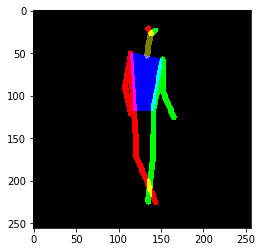

In [25]:
plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, dataset[1][2][1].data.numpy()))

# Daaaaance!

In [221]:
initial_dance = dataset[9][2][2].data.numpy()

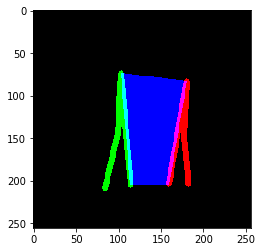

In [222]:
plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, initial_dance))

In [223]:
initial_dance

array([[-256., -256.],
       [ 142.,   78.],
       [ 180.,   83.],
       [ 177.,  149.],
       [ 182.,  204.],
       [ 103.,   74.],
       [  99.,  145.],
       [  84.,  209.],
       [ 159.,  204.],
       [-256., -256.],
       [-256., -256.],
       [ 114.,  205.],
       [-256., -256.],
       [-256., -256.],
       [-256., -256.],
       [-256., -256.],
       [ 164.,   32.],
       [ 124.,   33.]])

In [175]:
dummy = np.copy(initial_dance)
dummy[4] += 50

In [196]:
?plt.imsave(dataset.make_joint_img((256, 256, 3), dataset.jo, dummy))

In [150]:
radius

42.0

In [131]:
def generate_circle_trajectory(radius, center, start_y, end_y):
    y = np.arange(int(np.min([start_y, end_y])), int(np.max([start_y, end_y])) + 1)
    
    x = np.round(center[0] + np.sqrt(radius ** 2 - (y - center[1]) ** 2)).astype(np.int32)
    return x
    

In [132]:
np.min([start_y, end_y])

76.0

In [160]:
radius = np.round(np.linalg.norm(dummy[7] - dummy[6]) + 1)
x = generate_circle_trajectory(radius, [0, 0], -radius, radius)

In [162]:
y = np.arange(-radius, radius + 1)

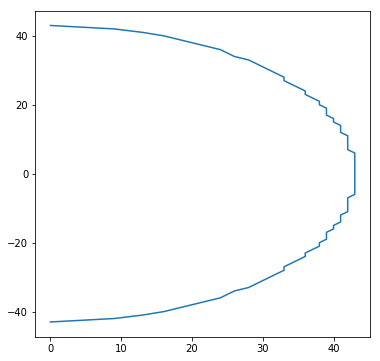

In [163]:
plt.figure(figsize=(6, 6))
plt.plot(x, y)

In [170]:
dummy = np.copy(initial_dance)
dummy[7] = dummy[6] - np.array([x[0], y[0]])

In [194]:
initial_dance = np.array([ [138.,  27.],
                           [133.,  53.],
                           [114.,  50.],
                           [108.,  90.],
                           [114., 121.],
                           [152.,  57.],
                           [152.,  95.],
                           [165., 126.],
                           [118., 118.],
                           [121., 172.],
                           [144., 226.],
                           [141., 118.],
                           [140., 172.],
                           [135., 225.],
                           [135.,  21.],
                           [144.,  23.],
                           [129.,  22.],
                           [150.,  27.] ]
                        )

def generate_circle_trajectory(radius, center, start_y, end_y):
    y = np.arange(int(np.min([start_y, end_y])), int(np.max([start_y, end_y])) + 1)
    
    x = np.round(center[0] + np.sqrt(radius ** 2 - (y - center[1]) ** 2)).astype(np.int32)
    return x

dancing_poses = []

for i in range(len(x)):
    dummy = np.copy(initial_dance)
    dummy[7] = dummy[6] - np.array([-x[i], y[i]])
    dummy[4] = dummy[3] - np.array([x[i], y[i]])
    #plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, dummy))
    #plt.show()
    dancing_poses.append(dummy)

for i in range(len(x)):
    dummy = np.copy(initial_dance)
    dummy[7] = dummy[6] + np.array([x[i], y[i]])
    dummy[4] = dummy[3] + np.array([-x[i], y[i]])
    #plt.imshow(dataset.make_joint_img((256, 256, 3), dataset.jo, dummy))
    #plt.show()
    dancing_poses.append(dummy)
    
np.save('dancing_poses.npy', np.array(dancing_poses))

In [242]:
my_dance = []
for i in range(200):
    my_dance.append(np.load('results/dance/pic_{}.png.npy'.format(i)))

In [243]:
sys.path.append('/home/aafilatov/Images2Life')

In [244]:
from utils.common_utils import write_video

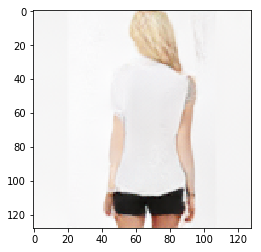

In [245]:
plt.imshow(my_dance[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

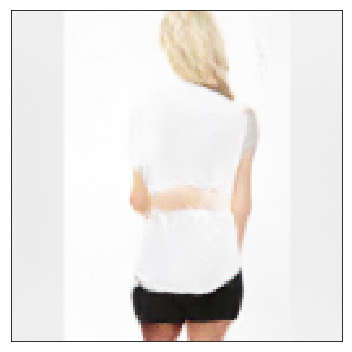

In [246]:
write_video("my_video_1.mp4", my_dance,)

In [148]:
radius ** 2 - (end_y - center[1]) ** 2

243.0

In [149]:
dummy[7][0]

165.0

In [137]:
dummy[7][0]

165.0

In [ ]:
generate_circle_trajectory()

In [17]:
dataset[0][2][0]

tensor([[ 126.,   29.],
        [ 154.,   71.],
        [ 140.,   69.],
        [ 133.,  149.],
        [ 102.,  189.],
        [ 168.,   74.],
        [ 177.,  146.],
        [ 172.,  203.],
        [ 136.,  175.],
        [-256., -256.],
        [-256., -256.],
        [ 145.,  178.],
        [-256., -256.],
        [-256., -256.],
        [ 125.,   23.],
        [ 134.,   21.],
        [-256., -256.],
        [ 160.,   22.]], dtype=torch.float64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4
5
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7
8
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10
11
12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13
14
15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16
17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18
19
20


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21
22
23
24
25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


26
27
28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29
30
31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32
33
34
35
36
37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


38
39
40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


41
42
43


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


44
45


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


46
47
48


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


49


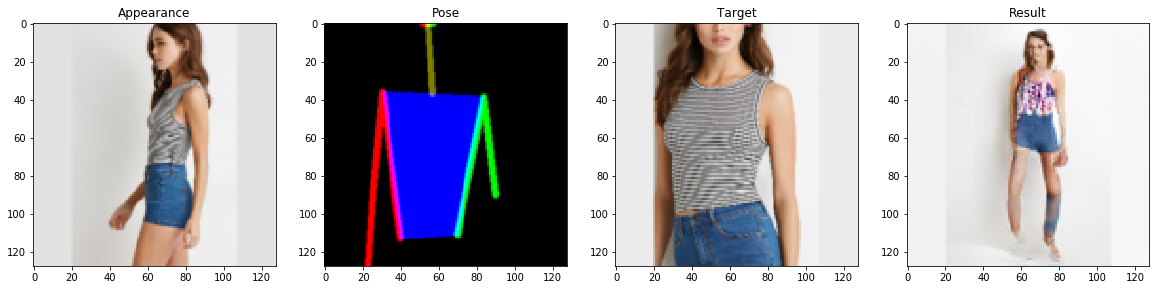

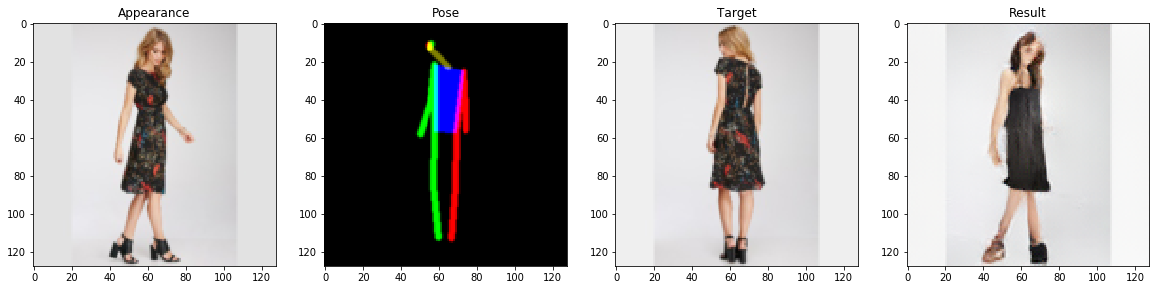

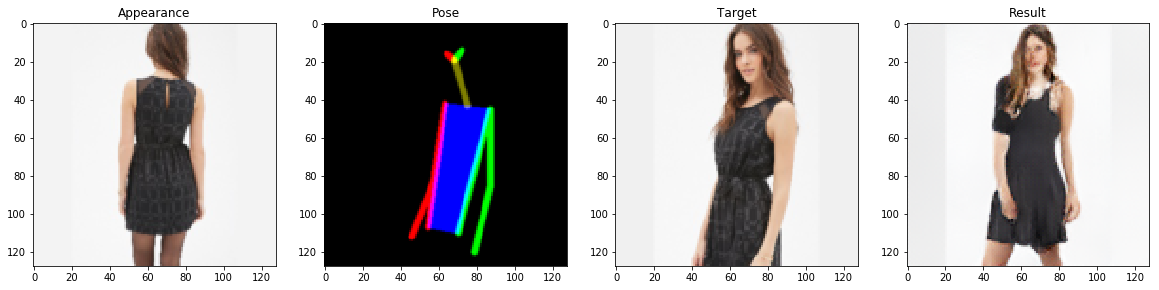

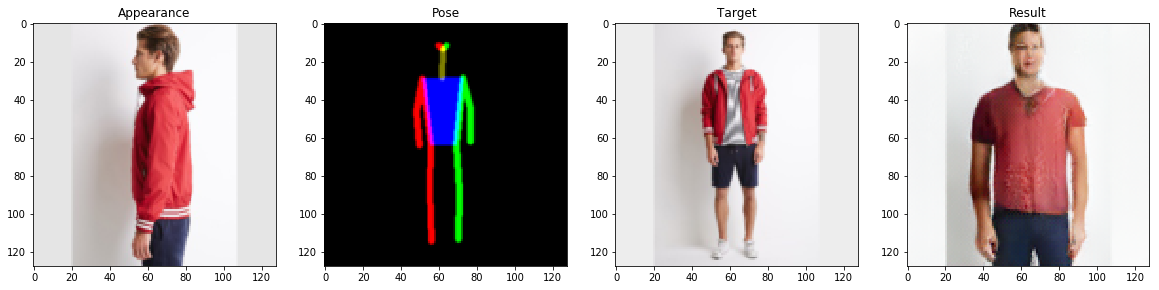

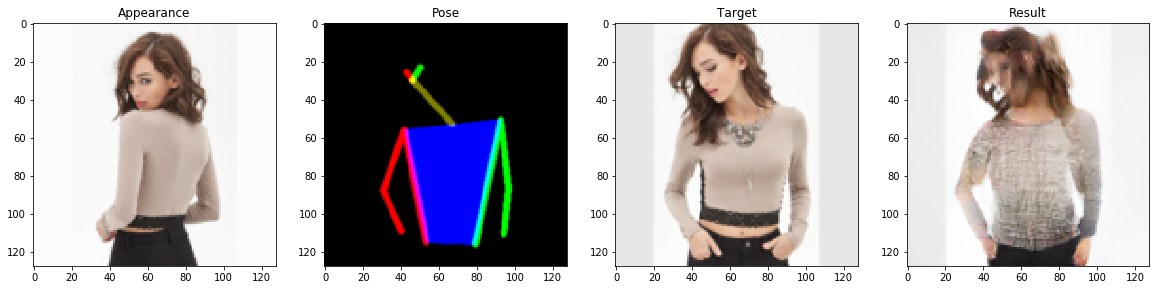

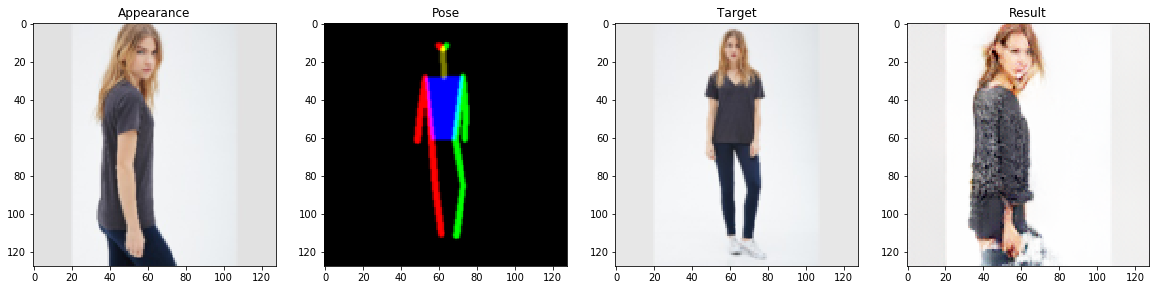

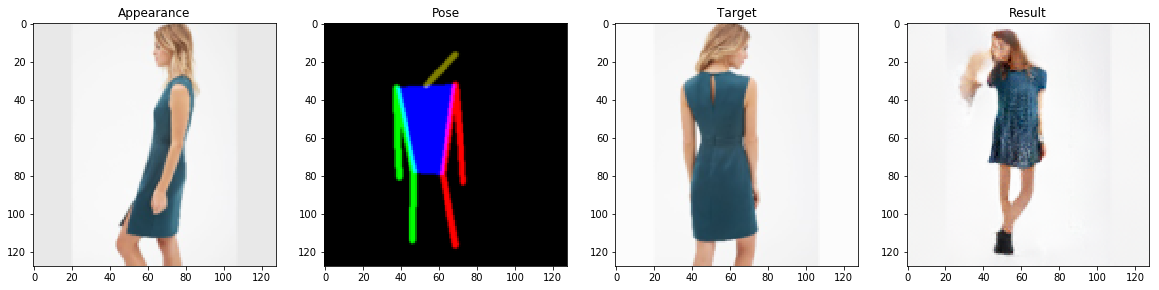

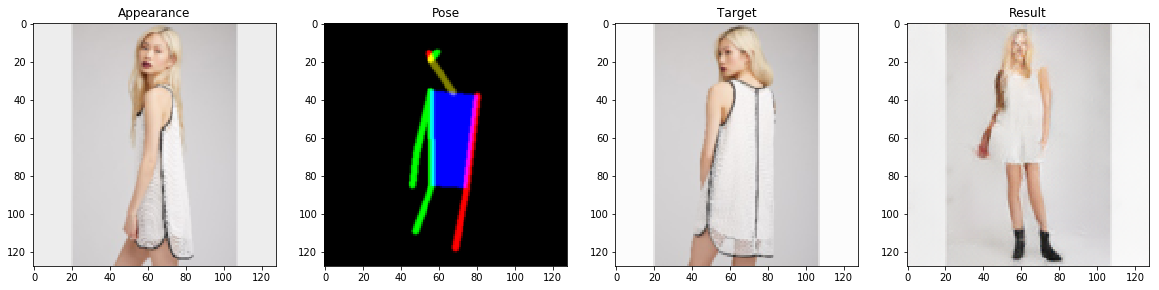

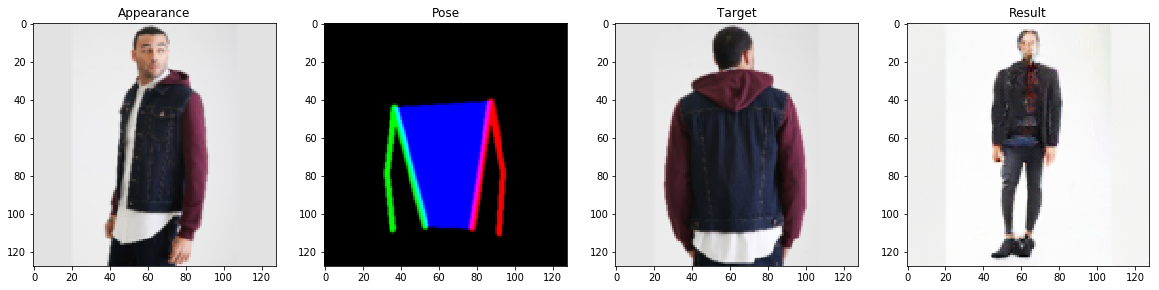

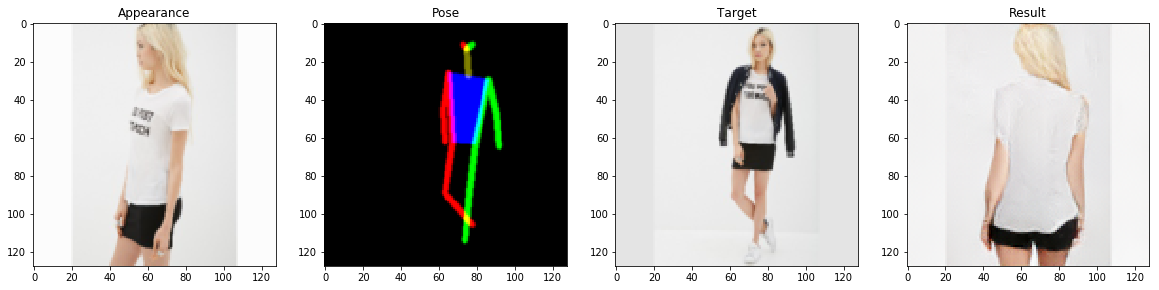

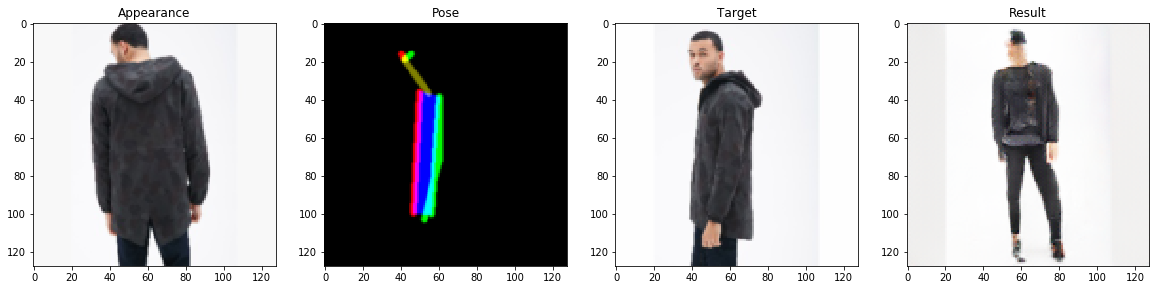

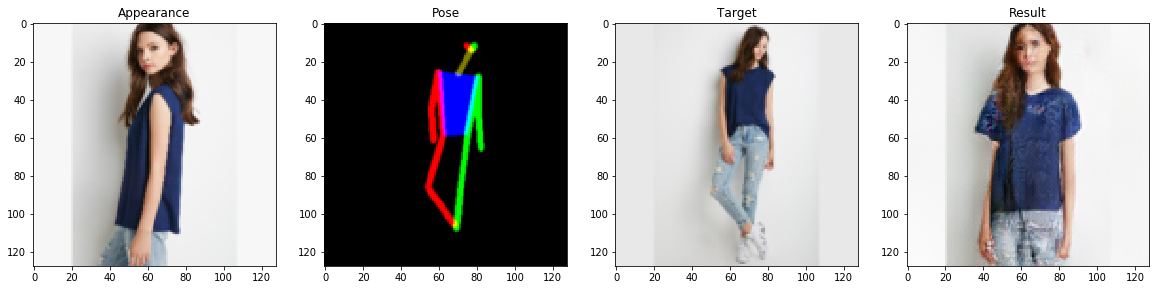

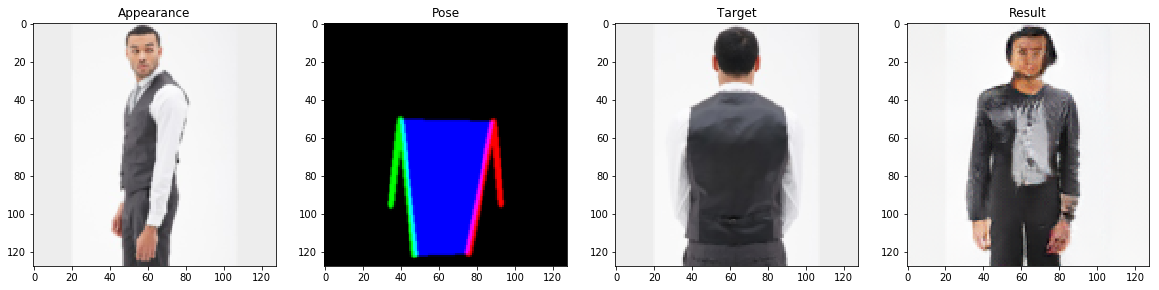

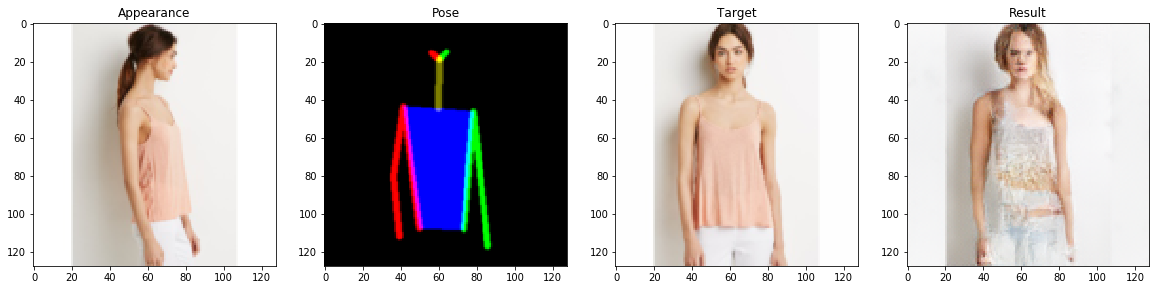

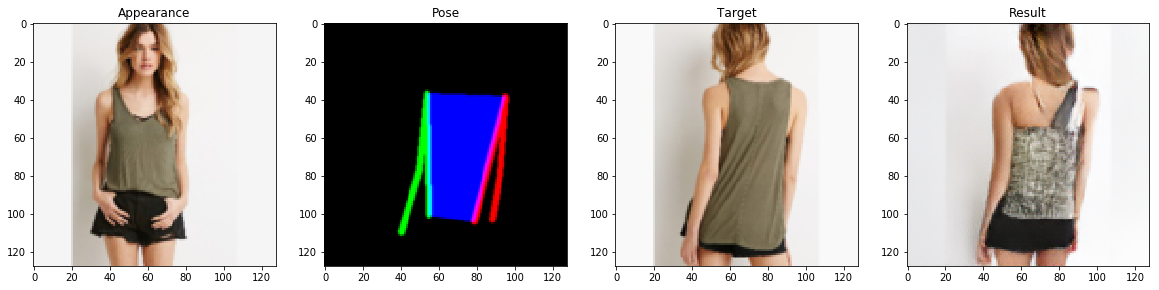

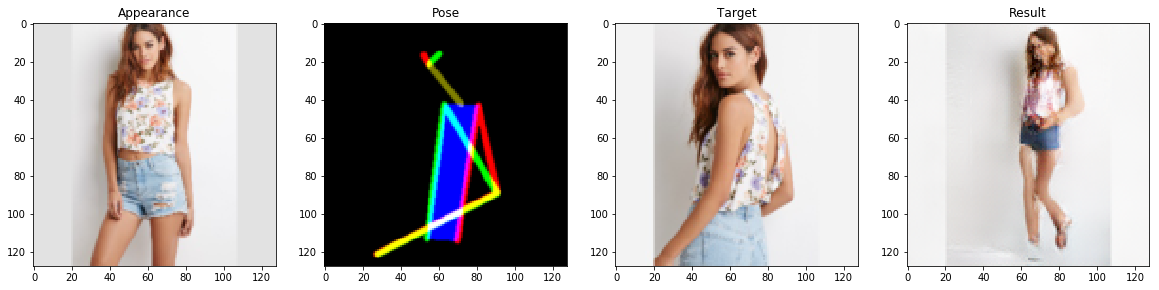

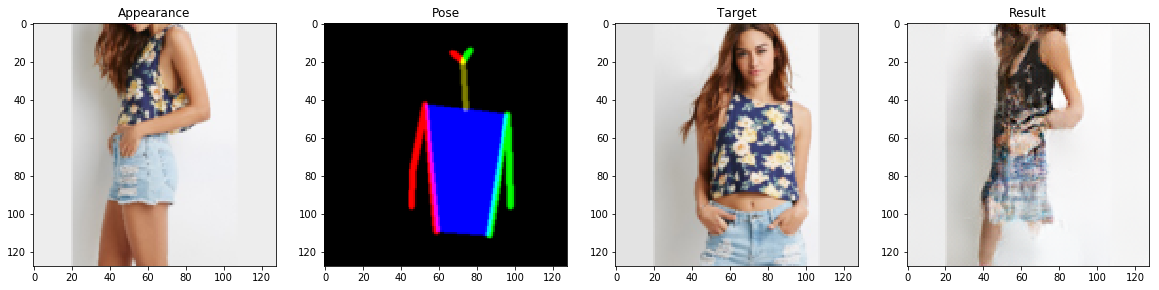

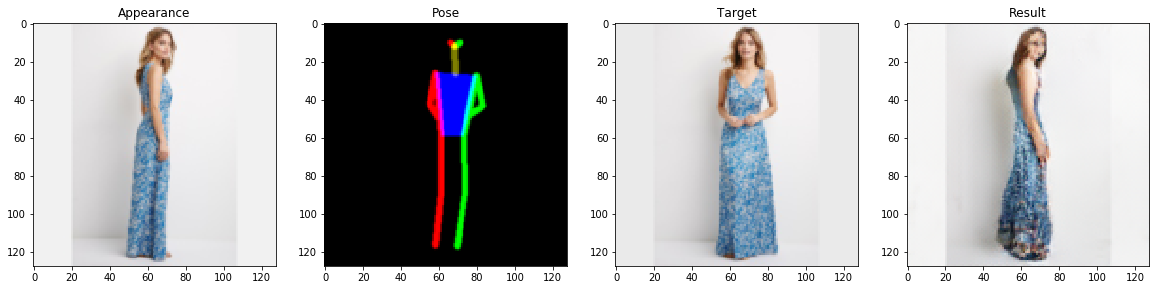

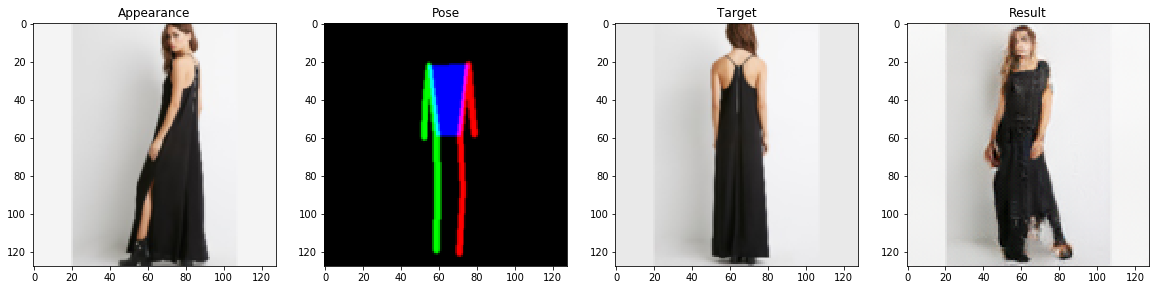

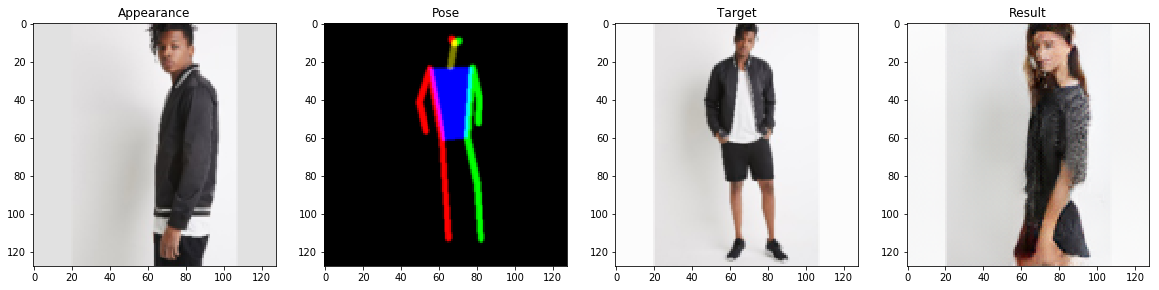

In [ ]:
i = 0
for i in range(len(dataset)):
    print(i)
    data_x = dataset[i][0]
    data_y = dataset[i][1]
    
    
    plt.figure(figsize=(20, 10))
    plt.subplot(141)
    plt.imshow(get_pic(data_x[0][None]))
    plt.title("Appearance")
    plt.subplot(142)
    plt.imshow(get_pic(data_y[-1][None]))
    plt.title("Pose")
    plt.subplot(143)
    plt.imshow(get_pic(data_x[-1][None]))
    plt.title("Target")
    plt.subplot(144)
    plt.imshow(np.load("results/pic_{}.npy".format(i)))
    plt.title("Result")
    i += 1
    if i == 50:
        break

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


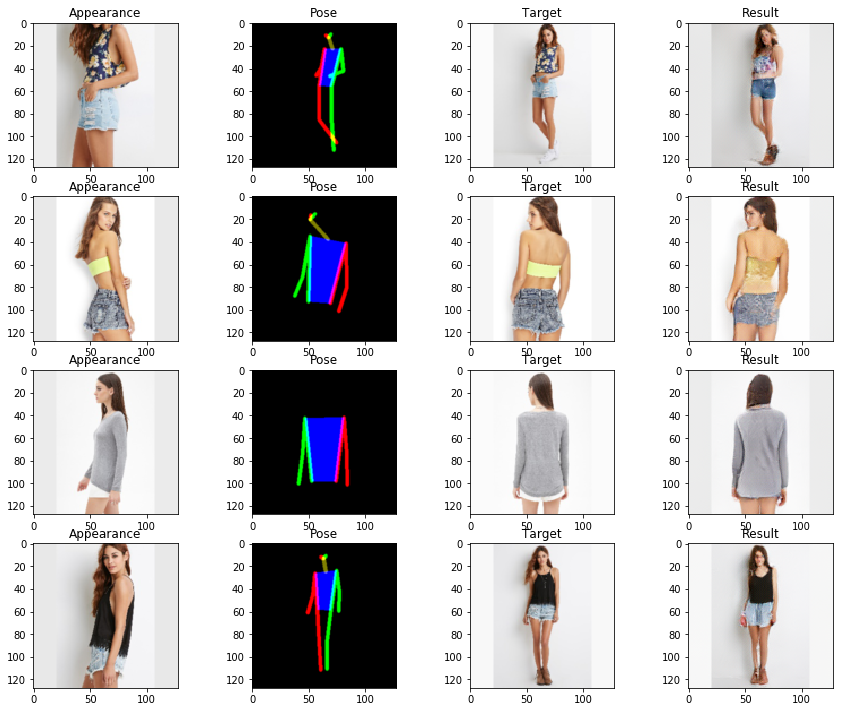

In [31]:
i = 0
n = 2
z = 1
k = [2, 3, 9, 14,16,26, 35, 49]
plt.figure(figsize=(15, 25))
for i in [16,26, 35, 49]:
    
    data_x = dataset[i][0]
    data_y = dataset[i][1]
    
    
    n = int(np.min([2, len(data_x) - 1]))
    plt.subplot(len(k), 4, z)
    z += 1
    plt.imshow(get_pic(data_x[0][None]))
    plt.title("Appearance")
    plt.subplot(len(k), 4, z)
    z += 1
    plt.imshow(get_pic(data_y[n][None]))
    plt.title("Pose")
    plt.subplot(len(k), 4, z)
    z += 1
    plt.imshow(get_pic(data_x[n][None]))
    plt.title("Target".format(i))
    plt.subplot(len(k), 4, z)
    z += 1 
    plt.imshow(np.load("results/pic_{}_{}.npy".format(i, n)))
    plt.title("Result")
    i += 1
    #z += 1

In [23]:
?plt.subplot